In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import PIL
import cv2
import random

In [3]:
training_path = r"E:\Work\Data_Science\Projects\Custom_Object_Detection\data\training_demo\train"
training_image_path = os.path.join(training_path, 'images')
traing_label_path = os.path.join(training_path, 'labels')

In [9]:
image_name = random.choice(os.listdir(training_image_path))
label_name = image_name.split('.')[0]+'.txt'
print(image_name, label_name)

001.jpg 001.txt


## Read an image

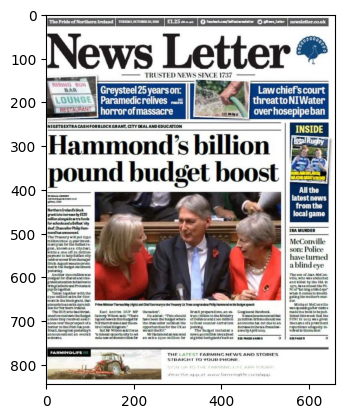

In [39]:
img = cv2.imread(os.path.join(training_image_path, image_name), cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [27]:
H, W = img.shape[:2]
H, W

(845, 660)

## Read the annotations

In [23]:
with open(os.path.join(traing_label_path, label_name), 'r') as f:
    while f:
        line = f.readline()
        print(line)
        if line == "":
            break

3 0.494697 0.106509 0.986364 0.149112

0 0.333333 0.235503 0.296970 0.106509

0 0.849242 0.232544 0.277273 0.100592

0 0.408333 0.395858 0.813636 0.159763

1 0.490152 0.626627 0.646970 0.289941

2 0.081061 0.708876 0.159091 0.362130

2 0.243939 0.842604 0.166667 0.099408

2 0.411364 0.850888 0.159091 0.111243

2 0.574242 0.840828 0.166667 0.102959

2 0.739394 0.839645 0.166667 0.102959

2 0.908333 0.792308 0.146970 0.197633

0 0.914394 0.644379 0.171212 0.098225

1 0.087879 0.224852 0.172727 0.127811

1 0.600000 0.230769 0.209091 0.125444




### point to be noted here is that these are tipical YOLO annotations
### so for each line there are 5 values that represents:-
### object_class, normalized_center_x, normalized_center_y, normalized_width, normalized_height

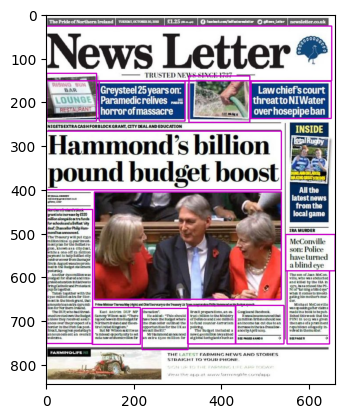

In [40]:
with open(os.path.join(traing_label_path, label_name), 'r') as f:
    while f:
        line = f.readline()
        if line == "":
            break
        label, x, y, w, h = line.split()
        label, x, y, w, h = (int(label), float(x), float(y), float(w), float(h))
        x1, y1, x2, y2 = (x-w/2, y-h/2, x+w/2, y+h/2)
        x1, y1, x2, y2 = (int(x1*W), int(y1*H), int(x2*W), int(y2*H))
        img = cv2.rectangle(img, (x1, y1), (x2,y2), (200,0,200), 2)
plt.imshow(img)